In [393]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

Dataset import

In [394]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Checking various datatypes


In [395]:
data.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [396]:
# Checking for nulls
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

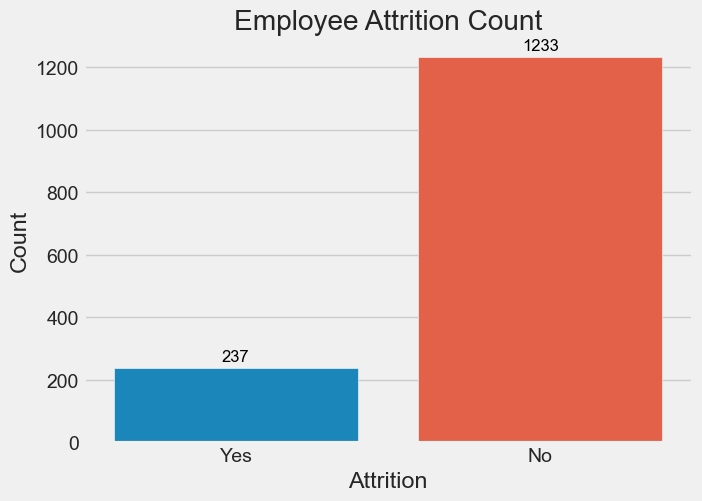

In [397]:
# Create a bar chart for Attrition
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data, x='Attrition')

# Add title and labels
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Note that the number of observations belonging to the ‘No’ category is way greater than that belonging to ‘Yes’ category. Hence we have skewed classes and this is a typical example of the ‘Imbalanced Classification Problem’.

# Exploratory Data Analysis

### Question 1. Is Age a factor in Attrition ?

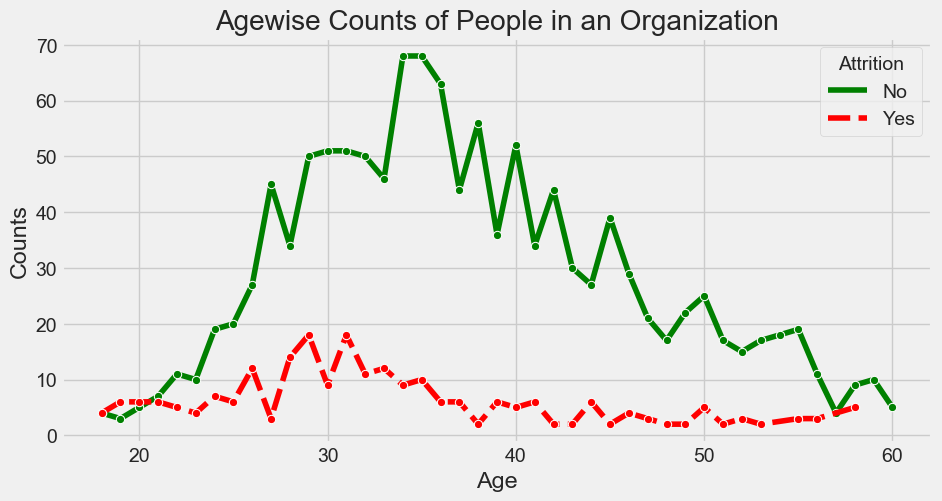

In [398]:
# Group the data by 'Age' and 'Attrition' and count the occurrences
age_att = data.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')


# Define custom colors for "No" and "Yes"
custom_palette = {'No': 'Green', 'Yes': 'red'}

# Create the plot
plt.figure(figsize=(10,5))
plt.title('Agewise Counts of People in an Organization')

# Plot the line chart
sns.lineplot(x='Age', y='Counts', hue='Attrition', data=age_att, marker="o", style='Attrition', palette=custom_palette)

# Customize legend and labels
plt.xlabel('Age')
plt.ylabel('Counts')

plt.show()

Analysis : The chart shows peak attrition between ages 28 and 32, as mid-career professionals seek new opportunities. After this, attrition declines with age as job stability becomes a priority. Younger employees (18-20) have higher attrition, likely due to career exploration, but it stabilizes around age 21 as they settle into their roles.

### Question 2. Is income the main factor towards employee attrition?

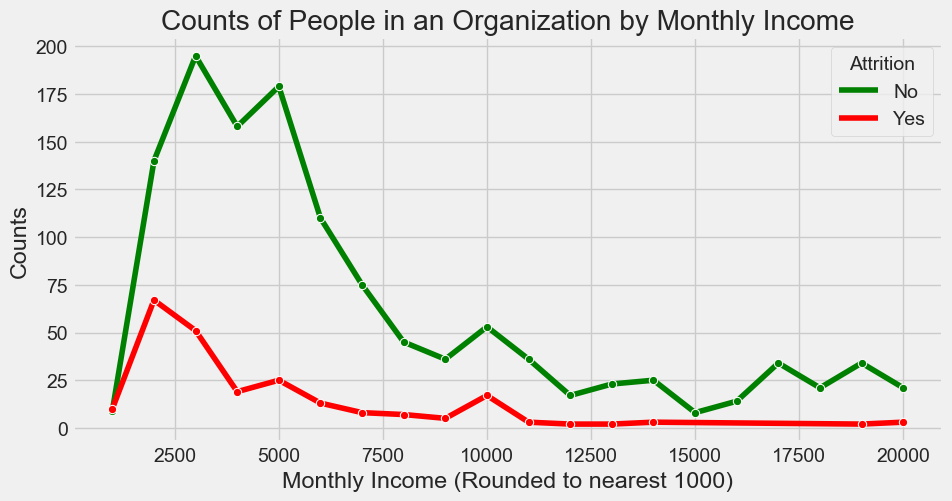

In [399]:
# Round the MonthlyIncome to the nearest thousand and group by 'MonthlyIncome' and 'Attrition'
rate_att = data.copy()
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)

# Group the data by 'MonthlyIncome' and 'Attrition' and count the occurrences
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Create the plot
plt.figure(figsize=(10,5))
plt.title('Counts of People in an Organization by Monthly Income')

# Plot the line chart with hue for Attrition
sns.lineplot(x='MonthlyIncome', y='Counts', hue='Attrition', data=rate_att, marker="o",palette=custom_palette)

# Show the plot
plt.xlabel('Monthly Income (Rounded to nearest 1000)')
plt.ylabel('Counts')
plt.show()

Analysis: The chart reveals that attrition is highest at lower income levels, particularly for employees earning less than $5,000 monthly. As income increases, attrition rates decrease. However, there is a noticeable uptick around the $10,000 mark, possibly reflecting a desire among middle-income employees to seek better opportunities for an improved standard of living. Beyond this point, attrition stabilizes, suggesting that employees with higher salaries are less likely to leave, likely due to greater job satisfaction and financial stability.

### Question 3. Does the Department of work impact attrition?


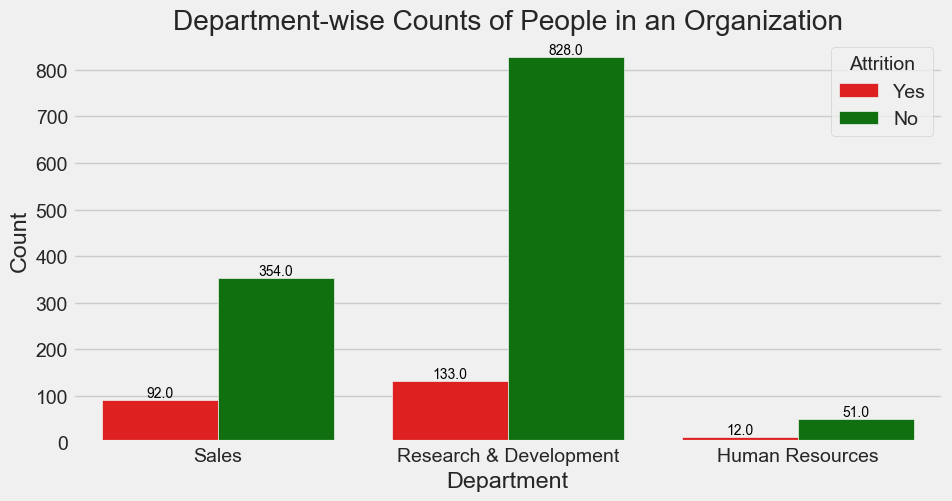

In [400]:
# Create the count plot
plt.figure(figsize=(10, 5))
plt.title('Department-wise Counts of People in an Organization')

# Use countplot with direct parameters for hue
count_plot=sns.countplot(x='Department', hue='Attrition', data=data,palette=custom_palette)

# Annotate bars with counts
for p in count_plot.patches:
    # Get the height of the bar
    height = p.get_height()
    
    # Annotate the bar with the count
    count_plot.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


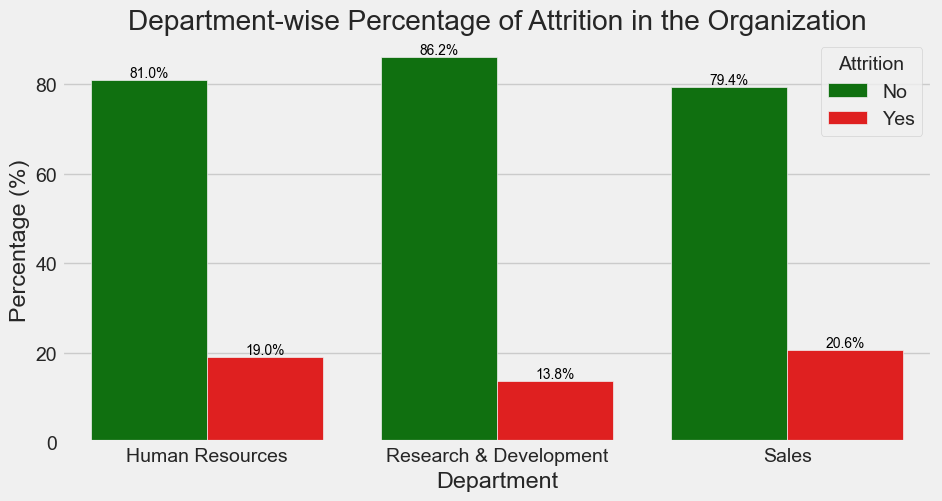

In [401]:
# Calculate counts of employees in each department for each attrition status
counts = data.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per department
total_counts = counts.groupby('Department')['Counts'].transform('sum')

# Calculate percentage for each attrition status
counts['Percentage'] = (counts['Counts'] / total_counts) * 100

# Create the percentage plot
plt.figure(figsize=(10, 5))
plt.title('Department-wise Percentage of Attrition in the Organization')

# Use barplot for percentages
bar_plot= sns.barplot(x='Department', y='Percentage', hue='Attrition', data=counts,palette=custom_palette)

# Add percentage labels on the bars
for p in bar_plot.patches:
    # Get the height of the bar (percentage)
    height = p.get_height()
    
    # Annotate the bar with the percentage
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.legend(title='Attrition')
plt.show()

Inferences: This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (20.6%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

### Question 4: How does the environment satisfaction impact attrition?


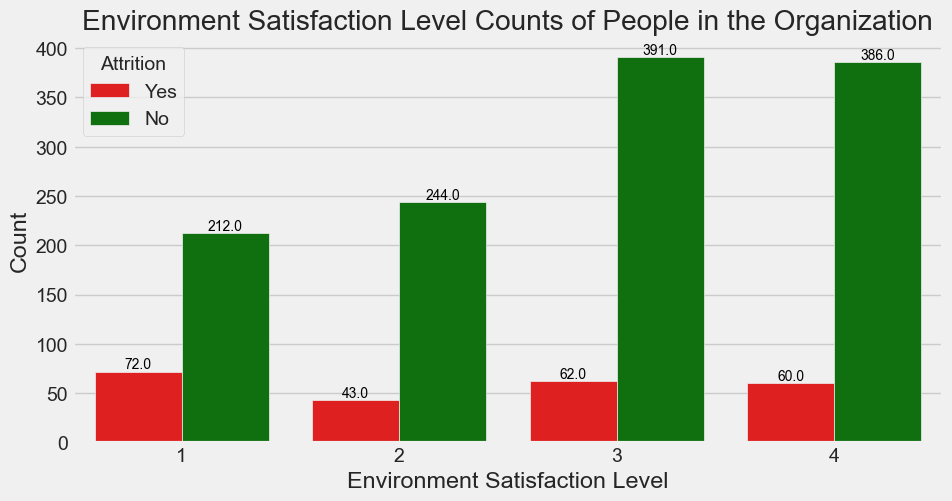

In [402]:
# Create the count plot
plt.figure(figsize=(10, 5))
plt.title('Environment Satisfaction Level Counts of People in the Organization')

# Use countplot with direct parameters for hue
count_plot = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data,palette=custom_palette)

# Annotate bars with counts
for p in count_plot.patches:
    # Get the height of the bar
    height = p.get_height()
    
    # Annotate the bar with the count
    count_plot.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

Inference: There is a positive correlation between low environmental satisfaction and attrition rates. The average attrition rate for medium, high, and very high environmental satisfaction is 14%. Level 1 attrition is 25.3%.


### Question 5: How does self Job Satisfaction impact the Attrition?



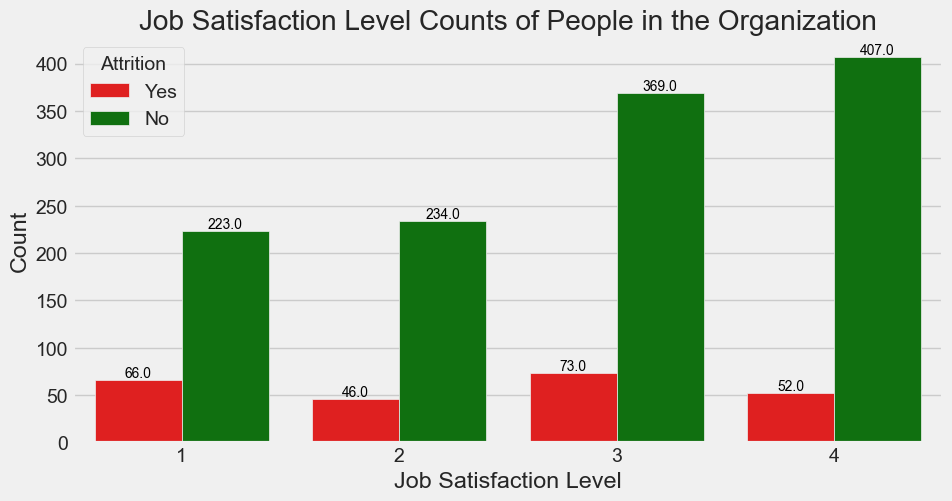

In [403]:
# Create the count plot
plt.figure(figsize=(10, 5))
plt.title('Job Satisfaction Level Counts of People in the Organization')

# Use countplot with direct parameters for hue
count_plot = sns.countplot(x='JobSatisfaction', hue='Attrition', data=data,palette=custom_palette)
# Annotate bars with counts
for p in count_plot.patches:
    # Get the height of the bar
    height = p.get_height()
    
    # Annotate the bar with the count
    count_plot.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()


Inference: A strong negative correlation exists between self-reported job satisfaction and employee attrition, meaning higher job satisfaction leads to significantly lower rates of employee turnover; essentially, when employees are more satisfied with their jobs, they are less likely to leave the company.

Factors influencing job satisfaction:
Factors like work-life balance, career development opportunities, recognition, and positive relationships with colleagues can all contribute to an employee's overall job satisfaction and, consequently, their decision to stay with the company

### Question 6: How does company stock impact attrition. 

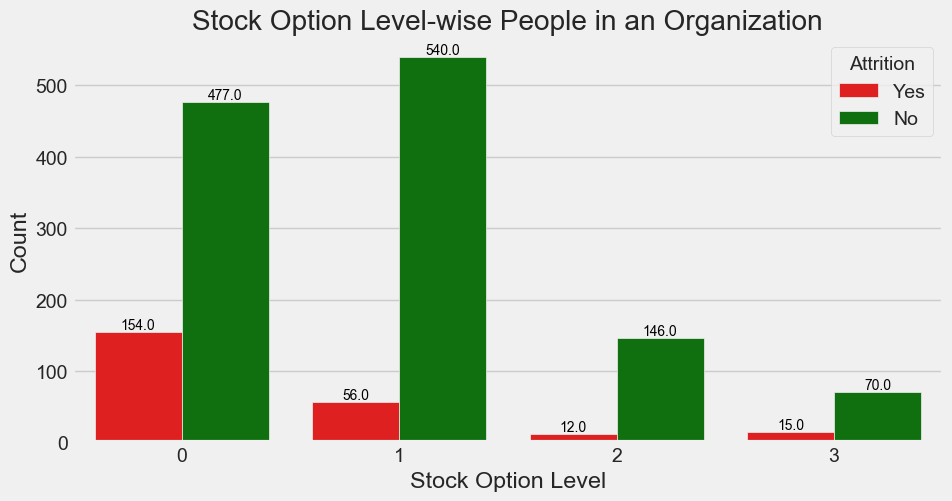

In [404]:
# Create the count plot
plt.figure(figsize=(10, 5))
plt.title('Stock Option Level-wise People in an Organization')

# Use countplot with direct parameters for hue
count_plot = sns.countplot(x='StockOptionLevel', hue='Attrition', data=data,palette=custom_palette)

# Annotate bars with counts
for p in count_plot.patches:
    # Get the height of the bar
    height = p.get_height()
    
    # Annotate the bar with the count
    count_plot.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()


Inference: Employees are more likely to leave the organization when stock option availability is limited. Stock options often represent significant financial gains over time, encouraging employees to stay longer to maximize this benefit. In contrast, those with few or no stock options have more flexibility to leave without sacrificing potential rewards.

### Question 7: How does Work Life Balance impact the overall attrition rates?


<Axes: xlabel='WorkLifeBalance', ylabel='count'>

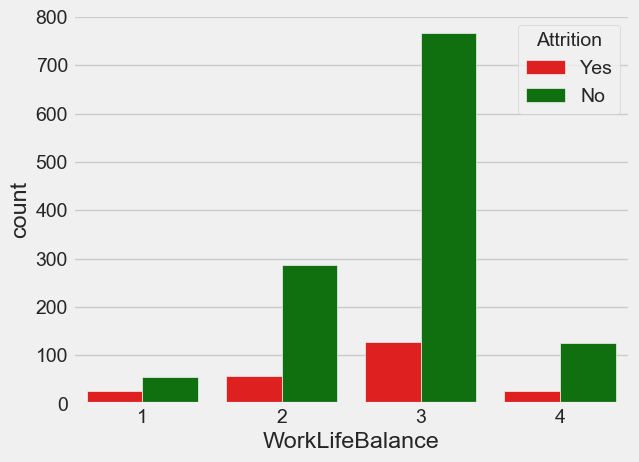

In [405]:
sns.countplot(x=data['WorkLifeBalance'],hue=data['Attrition'],palette=custom_palette)


In the IBM HR dataset, Work-Life Balance plays a significant role in influencing employee attrition. Here's an analysis of how it impacts overall attrition rates:

1. Low Work-Life Balance Leads to Higher Attrition:
Employees with a poor work-life balance (rated 1 or 2 in the dataset) tend to leave the organization more frequently. This is because a lack of balance between personal life and professional responsibilities often leads to stress, dissatisfaction, and burnout, prompting employees to seek better opportunities elsewhere.

2. Better Work-Life Balance Reduces Attrition:
On the other hand, employees with a higher work-life balance rating (3 or 4) generally have a lower attrition rate. Organizations that support a healthy work-life balance tend to retain employees longer, as they experience less stress and have more flexibility to manage both work and personal life.

3. Correlation Between Satisfaction and Work-Life Balance:
Often, work-life balance correlates with job satisfaction, which in turn impacts attrition. Employees with a good work-life balance tend to be more satisfied with their jobs and are more likely to stay.

### Correlation between Satisfaction and work life balance

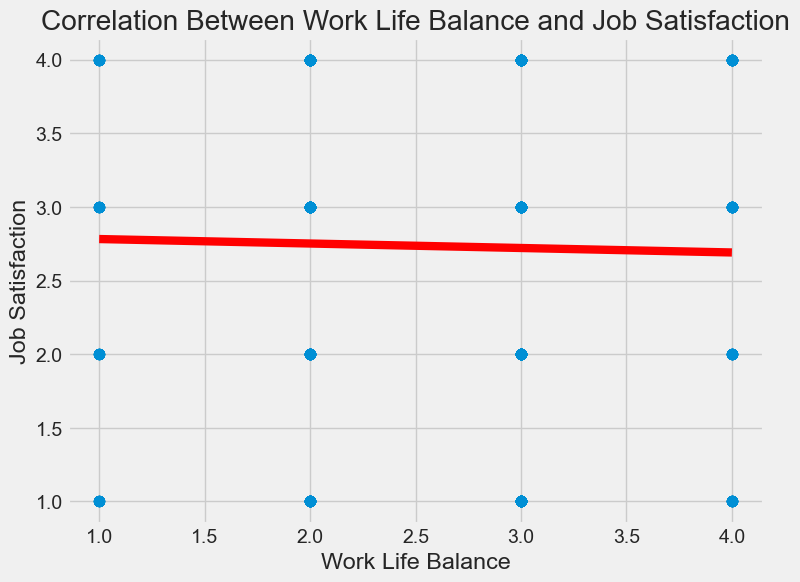

In [406]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot with linear regression line (optional)
sns.regplot(x='WorkLifeBalance', y='JobSatisfaction', data=data, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)

# Add plot title and labels
plt.title('Correlation Between Work Life Balance and Job Satisfaction')
plt.xlabel('Work Life Balance')
plt.ylabel('Job Satisfaction')

# Show the plot
plt.show()

### Question 8 : What is the Relation between Work experience vs attrition?


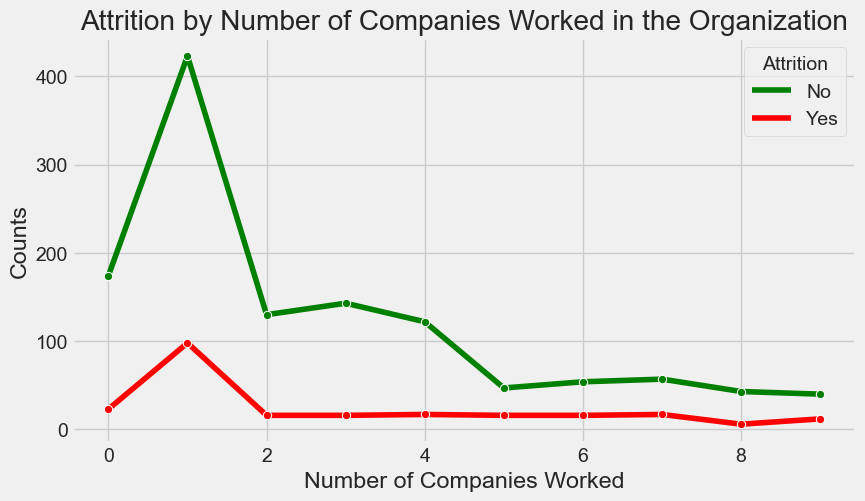

In [407]:
# Group data by 'NumCompaniesWorked' and 'Attrition' and count the occurrences
ncwrd_att = data.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')

# Set figure size
plt.figure(figsize=(9, 5))

# Add title to the plot
plt.title('Attrition by Number of Companies Worked in the Organization')

# Plot the line chart with hue for attrition status
sns.lineplot(x='NumCompaniesWorked', y='Counts', hue='Attrition', data=ncwrd_att, marker='o',palette=custom_palette)

# Show the plot with labels
plt.xlabel('Number of Companies Worked')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()


Inference: : Employees who start their careers with the company or switch early in their careers are more likely to leave for another job. In contrast, those with experience working in multiple companies tend to stay longer in the organization they've joined.

### Question 9 : How does Work duration in current role impact Attrition?


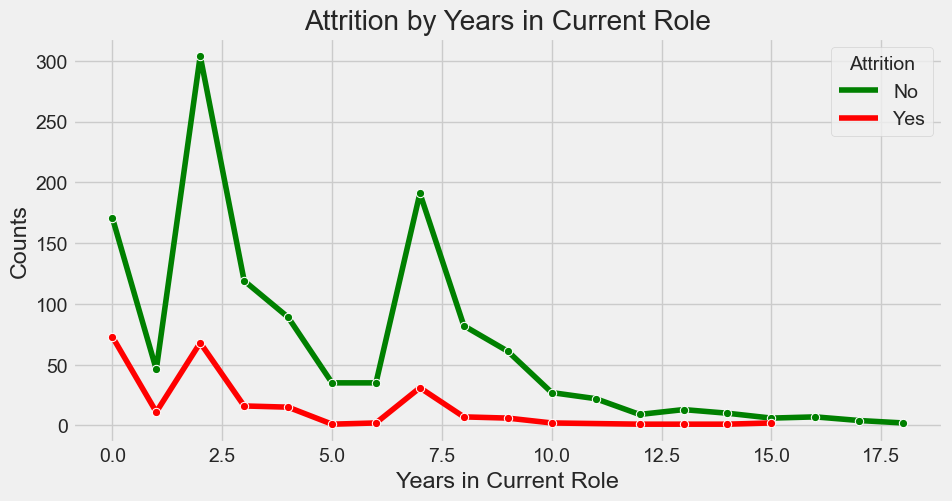

In [408]:
# Group data by 'YearsInCurrentRole' and 'Attrition' and count occurrences
yrscr_att = data.groupby(['YearsInCurrentRole', 'Attrition']).size().reset_index(name='Counts')

# Set figure size
plt.figure(figsize=(10, 5))

# Add title to the plot
plt.title('Attrition by Years in Current Role')

# Plot the line chart with markers
sns.lineplot(x='YearsInCurrentRole', y='Counts', hue='Attrition', data=yrscr_att, marker='o',palette=custom_palette)

# Set axis labels
plt.xlabel('Years in Current Role')
plt.ylabel('Counts')

# Display legend with title
plt.legend(title='Attrition')

# Show the plot
plt.show()


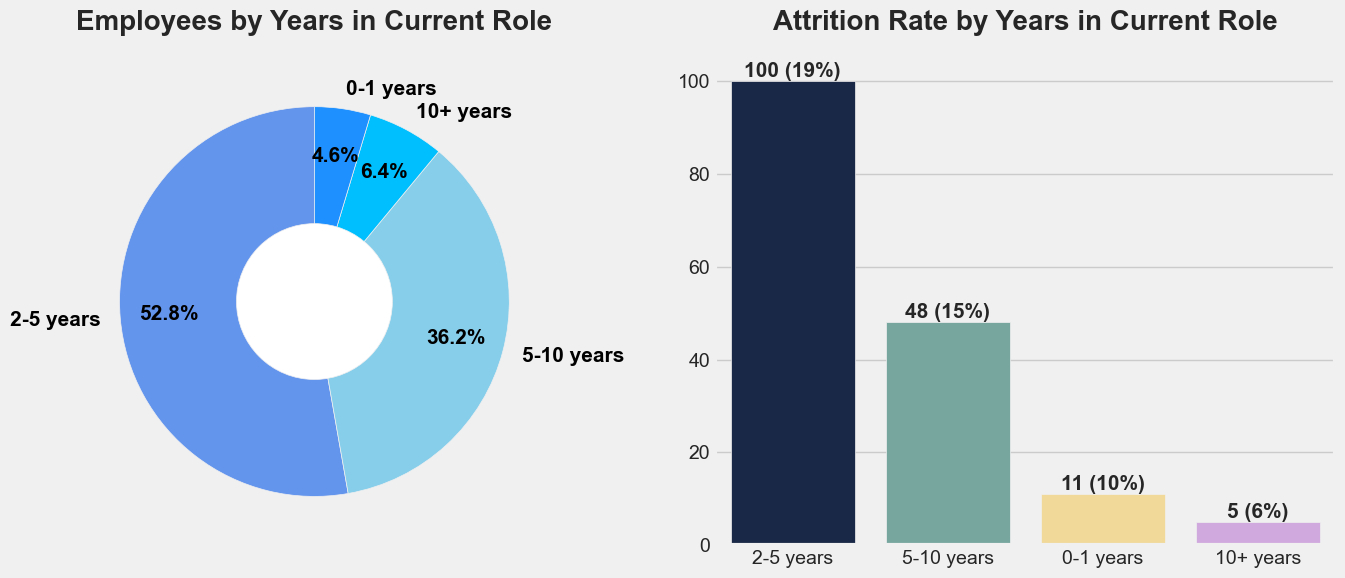

In [409]:
# Define the bin edges and labels for the groups
bin_edges = [0, 1, 5, 10, 20]
bin_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Cut the 'YearsInCurrentRole' column into groups
data["YearsInCurrentRoleGroup"] = pd.cut(data['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

# Set figure size for the subplots
plt.figure(figsize=(14, 6))

# Visualization to show Total Employees by YearsInCurrentRoleGroup
plt.subplot(1, 2, 1)
value_1 = data["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by Years in Current Role", fontweight="bold", size=20, pad=20)
plt.pie(value_1, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'], 
        textprops={"fontweight": "bold", "size": 15, "color": "black"})
# Add a white circle at the center of the pie to make it a donut chart
center_circle = plt.Circle((0, 0), 0.4, fc='white')
plt.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by YearsInCurrentRoleGroup
plt.subplot(1, 2, 2)
value_2 = data[data["Attrition"] == "Yes"]["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values

sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by Years in Current Role", fontweight="bold", size=20, pad=20)

# Add count and percentage labels on the bars
for index, value in enumerate(value_2):
    plt.text(index, value, f"{value} ({int(attrition_rate[index])}%)", ha="center", va="bottom",
             size=15, fontweight="bold")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Inference : Employees are more likely to leave the organization during the early years in their current role. However, those who remain in the same role for a longer period tend to stay, often waiting for opportunities to move into higher positions.

### Question 10: Does Hike percentage impact Attrition?

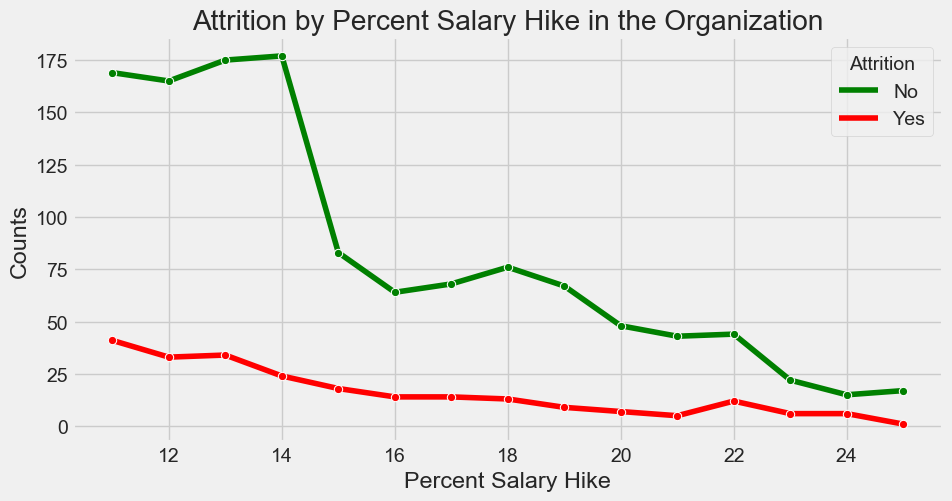

In [410]:
# Group data by 'PercentSalaryHike' and 'Attrition', then count occurrences
hike_att = data.groupby(['PercentSalaryHike', 'Attrition']).size().reset_index(name='Counts')

# Set figure size
plt.figure(figsize=(10, 5))

# Add a meaningful title
plt.title('Attrition by Percent Salary Hike in the Organization')

# Plot the line chart with markers
sns.lineplot(x='PercentSalaryHike', y='Counts', hue='Attrition', data=hike_att, marker='o',palette=custom_palette)

# Set axis labels
plt.xlabel('Percent Salary Hike')
plt.ylabel('Counts')

# Display legend with title
plt.legend(title='Attrition')

# Show the plot
plt.show()


Inference : Negative Correlation: The analysis of the IBM Attrition dataset typically shows a negative correlation between salary hikes and attrition rates. Employees receiving higher percentage salary hikes are less likely to leave the organization. This suggests that competitive compensation positively influences employee retention.

### Question 11 : Are managers a reason of people resigning?

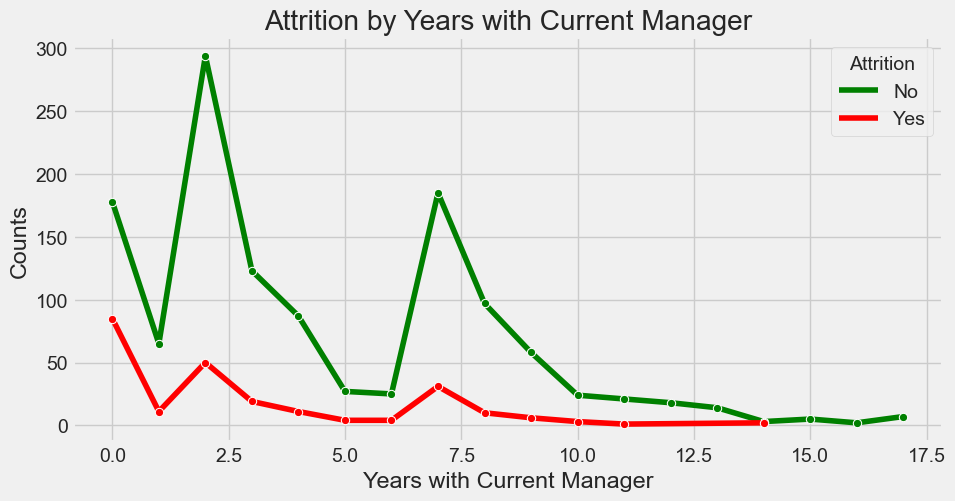

In [411]:
# Group data by 'YearsWithCurrManager' and 'Attrition', then count occurrences
man_att = data.groupby(['YearsWithCurrManager', 'Attrition']).size().reset_index(name='Counts')

# Set figure size
plt.figure(figsize=(10, 5))

# Add a meaningful title
plt.title('Attrition by Years with Current Manager')

# Plot the line chart with markers
sns.lineplot(x='YearsWithCurrManager', y='Counts', hue='Attrition', data=man_att, marker='o',palette=custom_palette)

# Set axis labels
plt.xlabel('Years with Current Manager')
plt.ylabel('Counts')

# Display legend with title
plt.legend(title='Attrition')

# Show the plot
plt.show()


Inference : The attrition rate shows three key spikes in relation to employees' tenure with their managers. Initially, employees who have spent less time with their manager are more likely to leave, often influenced by their previous management experiences. Around the two-year mark, employees seek improvement and may choose to change jobs. After approximately seven years, employees often feel stagnant in their career progression, prompting them to consider leaving. However, those with a long tenure with their current manager tend to be more satisfied, resulting in significantly lower resignation rates.

In [412]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that ‘EmployeeCount’, ‘Over18’, ‘StandardHours’ have only one unique values and ‘EmployeeNumber’ has 1470 unique values. This features aren’t useful for us, So we are going to drop those columns.

In [413]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','YearsInCurrentRoleGroup'], axis="columns", inplace=True)

In [414]:
# tranform binary feature into 0 and 1
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

<Axes: >

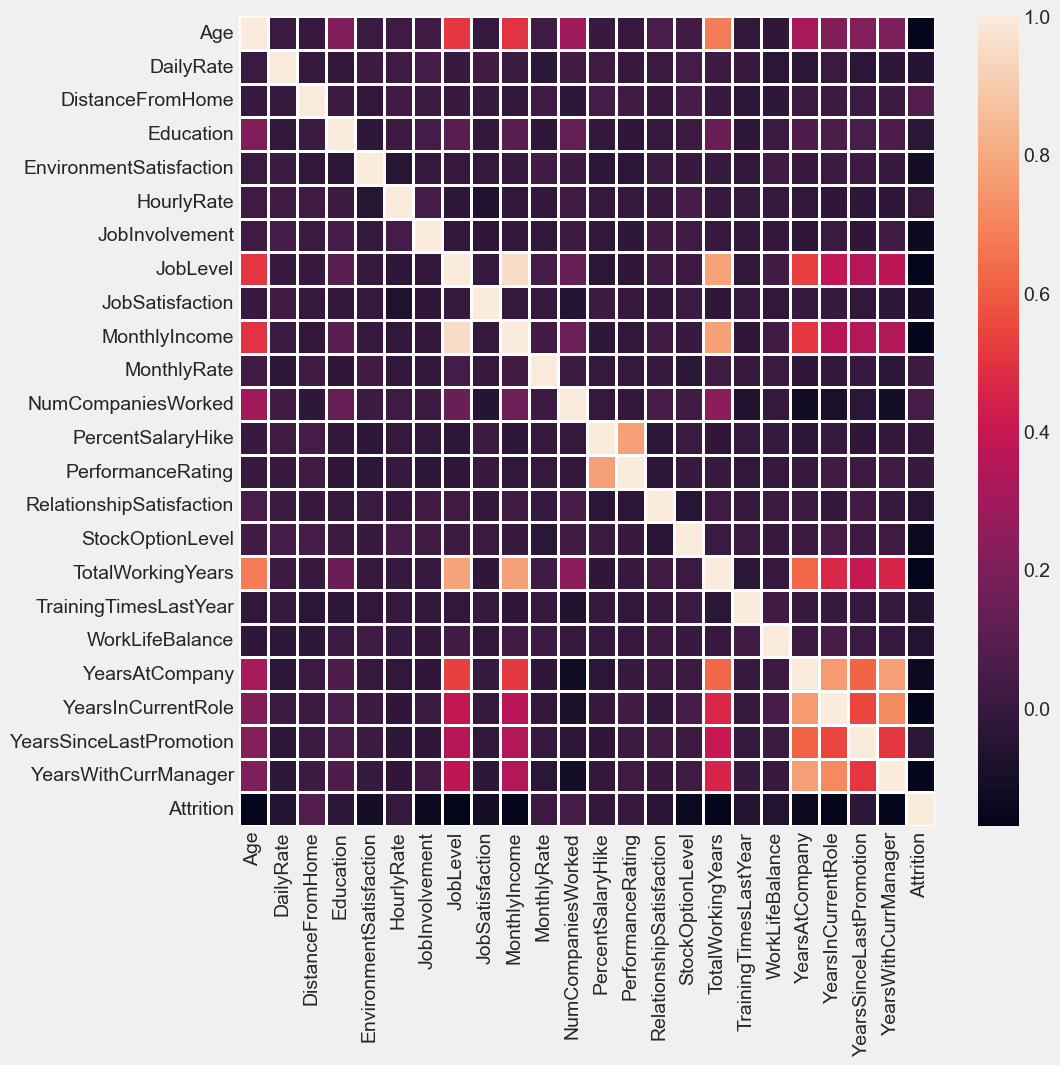

In [415]:
# check correlation between numerical features and target variable
corr_score = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr("pearson")
corr_score


plt.figure(figsize = (10,10))
sns.heatmap(corr_score, linewidth = 1)

<Axes: >

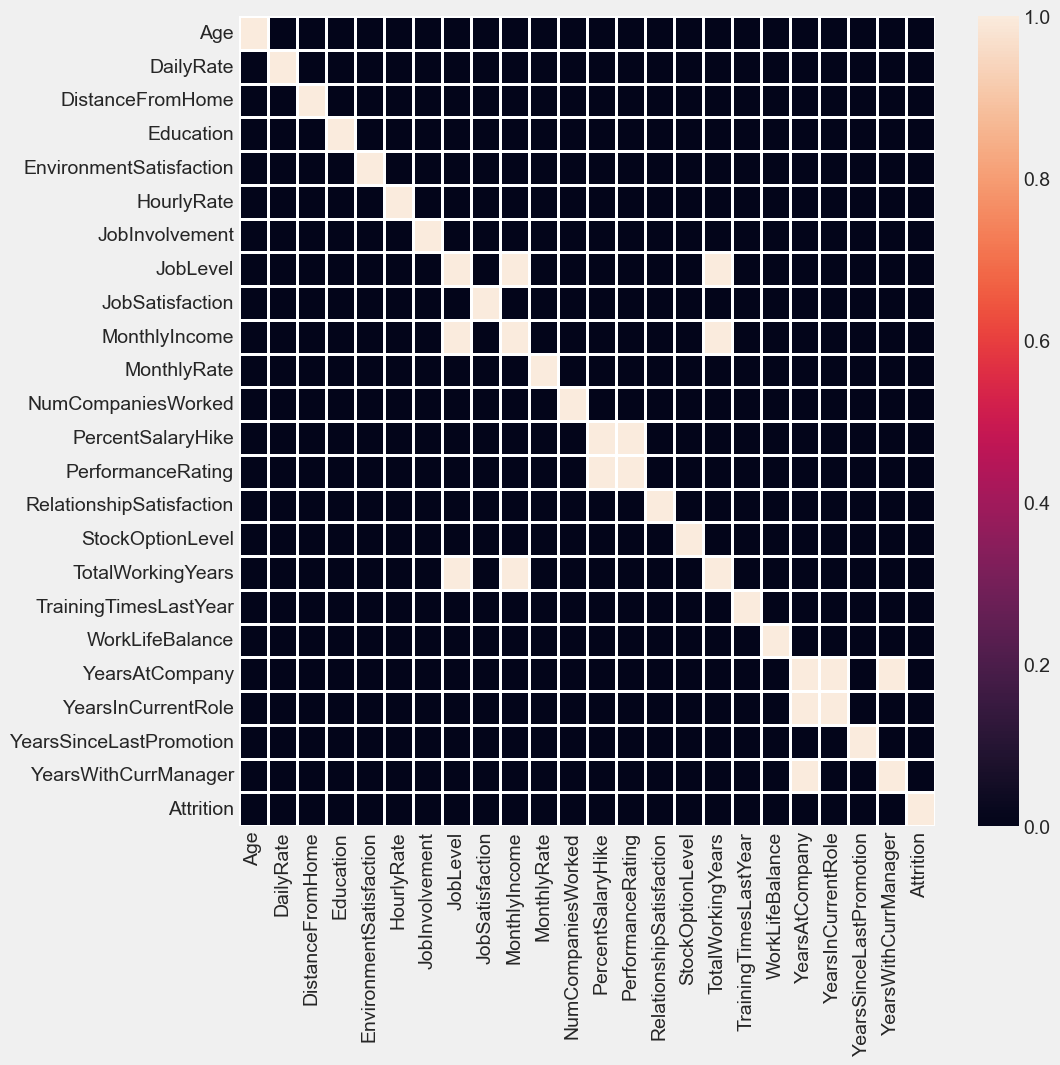

In [416]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(corr_score) > 0.75, linewidth = 1)

Variables like JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrentManager are highly correlated. These variables may lead to multicollinearity.

In [417]:
display(data.head())
print()
print('There are', data.shape[0], 'observations and', data.shape[1], 'features')

# Attrition column: stay is 0, churn is 1 
# Gender column: female is 0, male is 1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2



There are 1470 observations and 31 features


### Checking Data imbalance

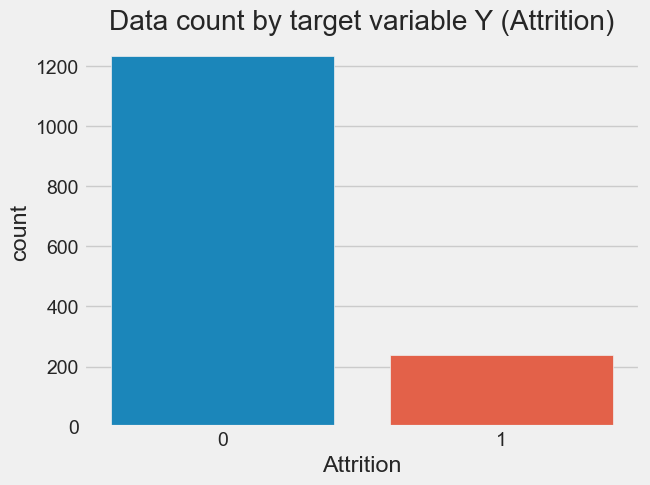

In [418]:
sns.countplot(x=data['Attrition'])
plt.title('Data count by target variable Y (Attrition)')
plt.show()

In [419]:
# Drop the target column and get a clean dataframe with features
y = data['Attrition']
df_clean = data.drop(columns = ['Attrition'])

# apply one hot encoding to non numerical features
df_clean = pd.get_dummies(df_clean, columns = ['BusinessTravel', 'Gender','MaritalStatus'], drop_first = True)
df_clean = pd.get_dummies(df_clean)
df_clean.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,False,False,False,True,False
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,False,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,True,False,False,False,False,False,False
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,False,False,False,True,False,False
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,True,False,False,False,False,False,False


In [420]:
print('There are', df_clean.shape[0], 'observations and', df_clean.shape[1], 'features')

There are 1470 observations and 47 features


#### Splitting the data into the training and test set, with the test set being 25% of the data.Set stratify to the same as your y (which is attrition in this case). Stratify makes sure the % of the 0s and 1s are the same in the training and the test sets.



In [421]:
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report
attrition = data['Attrition']
model_df = data.drop(columns=['Attrition'])

x_train, x_test, y_train, y_test = train_test_split(model_df,
                                                    attrition,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    stratify=attrition)

In [422]:
# Checking that the training and the testing data sets are of intended form
# The x and y training sets and x and y testing sets should be of the same
# length. The x training and test sets and the y training and test sets should
# be of the same length as well.

print('X train set shape:', x_train.shape)
print('Y train set shape:', y_train.shape)
print('X test set shape:', x_test.shape)
print('Y test set shape:', y_test.shape)

X train set shape: (1102, 30)
Y train set shape: (1102,)
X test set shape: (368, 30)
Y test set shape: (368,)


In [423]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


#Decision tree model 
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(x_train,y_train)

#XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

print()

ValueError: could not convert string to float: 'Travel_Rarely'

In [391]:
def cross_val(model, scoring, x_test, y_test):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  scores = cross_val_score(model, x_test, y_test, scoring=scoring, cv=cv, n_jobs=-1)
  return np.mean(scores)

def results(model, name, x_test, y_test, verbose=True):
  scorers_lst = ['recall', 'precision', 'f1']

  scores = [] # cross validated scores on three metrics
  for i in scorers_lst:
    scores.append(cross_val(model, i, x_test, y_test))
  
  if verbose:
    print('Recall for', name, round(scores[0], 4))
    print('Precision for', name, round(scores[1], 4))
    print('F1 for', name, round(scores[2], 4))
    print()
  else:
    return scores

In [ ]:
models = {'Decision Tree': dt_model,
          'XGBoost': xgb_model,
          'Logistic Regression': lr_model}

for key in models:
  results(models[key], key, x_test, y_test)